In [34]:
# determining whether piece of writing is positive,negative or neutral, opinion mining which determine the attitude of speaker
# feedback forms, guest info, restaurant s/w

# types of sentiment analysis:1. emotion detection(identification of human emotions), facial expressions

# 2. fine grained sentiment analysis: done at text or sentence level( very +ve, +ve  , neutral , negative , very negative)

# 3. multilingual sentiment analysis:  sentiment analysis done in multiple languages, done by neural n/w archtectures 
# Google BERT, XLNET 

# 4. Aspect based sentiment analysis:  breaking down text into aspects, components or attributes and assigning every attribute 
# a sentiment level






import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\profn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\profn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
df = pd.read_csv('Reviews1.txt')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [38]:
df.shape

(500, 10)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [40]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [41]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [42]:
! pip install textblob

In [43]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [44]:
# \w remove digits + alphabetical characters ,  \s  remove white space
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(5)

C:\Users\profn\AppData\Local\Temp/ipykernel_28744/3537081363.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', "")


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [45]:
string = "yoo the food was delicious "
print(string.replace("delicious", "Yummy"))  

yoo the food was Yummy 


In [46]:
# Removal of Stop Words
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [19]:
#Spelling Correction
# lemmatization: process of grouping the inflected form of words in order to analyze them as single word in linguistics
# Lemmatization:NLTK : stemming: caring  car        lemmatization : caring     care

In [47]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [48]:
! pip install wordcloud

In [49]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [50]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [51]:
df.Score.value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='count'>

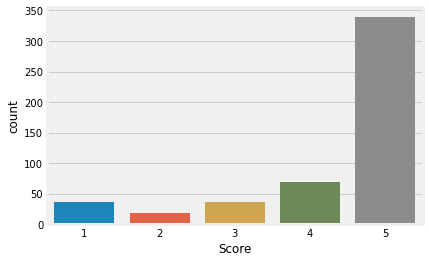

In [53]:
import seaborn as sns
sns.countplot(data = df, x = 'Score')

In [57]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df

# Dropping null values
reviews.dropna(inplace=True)

In [58]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [59]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

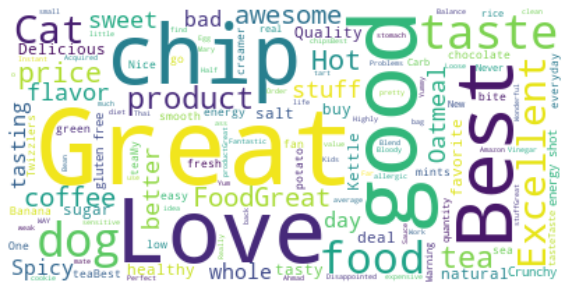

In [23]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Scores')

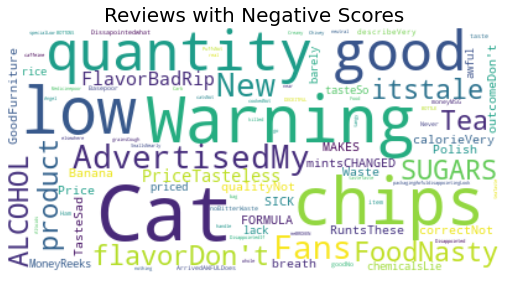

In [25]:
#Create WordCloud
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

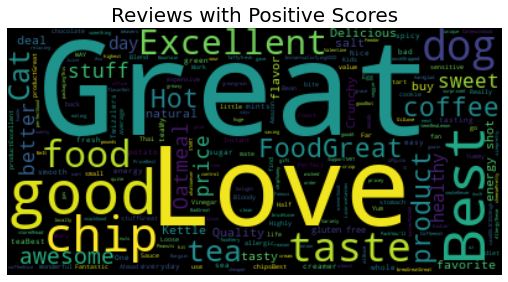

In [61]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [62]:
#Sentiment Score
#Install vaderSentiment
!pip install vaderSentiment

In [28]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [63]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [64]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532


In [65]:
# # Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive


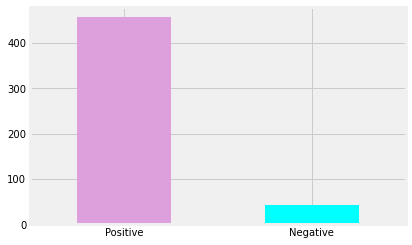

In [66]:
# Result
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);